In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import tensorflow as tf

# setup plotting
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


C:\Users\black\AppData\Local\Temp\ipykernel_13112\827628983.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Read the data
    - task is to predict the compressive strength of concrete manufactured according to various recipes.

In [6]:
concrete = pd.read_csv('./dl-course-data/concrete.csv')
concrete.head() 

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# input shape
input_shape = [concrete.shape[1] - 1]
input_shape

features = concrete.drop(axis=1, columns=['CompressiveStrength'])
target = concrete[['CompressiveStrength']]
target.head()
 

,CompressiveStrength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


# 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# model

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units = 512, input_shape=input_shape, activation='relu', name = 'layer1'),
    layers.Dense(units = 512, activation='relu', name='layer2'),
    layers.Dense(units = 512, activation='relu', name='layer3'),
    # the linear output layer 
    layers.Dense(units = 1)
])

# 3) Activation Layers #

Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

Rewrite the following model so that each activation is in its own `Activation` layer.

In [6]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

# Optional: Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

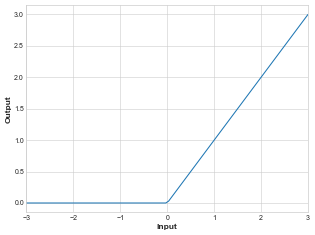

In [7]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=50)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

What's In a Name?

The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD!

### Example - Red Wine Quality


In [9]:
# from Ipython.display import display

red_wine = pd.read_csv('./dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

display(df_train.head(4))

# Scale to [0, 1] => MinMax Scaler
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [10]:
print(X_train.shape)

(1119, 11)


In [11]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mse', # mean squared error
    # loss= 'mae'
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data= (X_valid, y_valid),
    batch_size=256,
    epochs=10
)

Epoch 1/10
5/5 [==============================] - 3s 138ms/step - loss: 0.1094 - val_loss: 0.0322
Epoch 2/10
5/5 [==============================] - 0s 49ms/step - loss: 0.0325 - val_loss: 0.0271
Epoch 3/10
5/5 [==============================] - 0s 56ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 4/10
5/5 [==============================] - 0s 51ms/step - loss: 0.0224 - val_loss: 0.0223
Epoch 5/10
5/5 [==============================] - 0s 52ms/step - loss: 0.0211 - val_loss: 0.0184
Epoch 6/10
5/5 [==============================] - 0s 52ms/step - loss: 0.0198 - val_loss: 0.0189
Epoch 7/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0191 - val_loss: 0.0171
Epoch 8/10
5/5 [==============================] - 0s 58ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 9/10
5/5 [==============================] - 0s 54ms/step - loss: 0.0176 - val_loss: 0.0167
Epoch 10/10
5/5 [==============================] - 0s 57ms/step - loss: 0.0172 - val_loss: 0.0167


<Axes: >

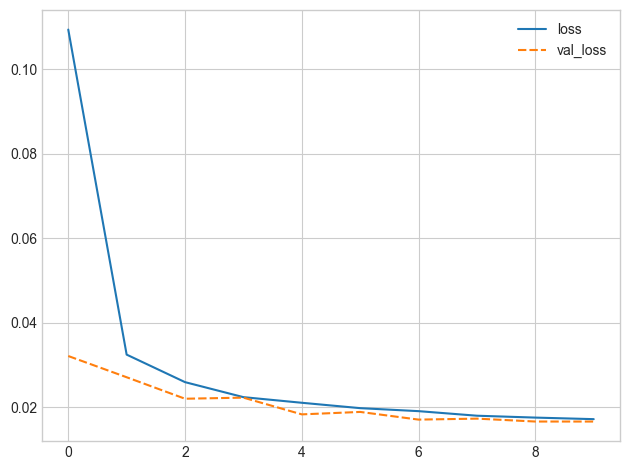

In [18]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

sns.lineplot(history_df)
# history_df['loss'].plot()

In this exercise you'll train a neural network on the Fuel Economy dataset and then explore the effect of the learning rate and batch size on SGD.

In [19]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

C:\Users\black\AppData\Local\Temp\ipykernel_13112\2426236682.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('./dl-course-data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [26]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [34]:
pd.DataFrame(X[:10, :]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [38]:
#  define a loss function and an optimizer
model.compile(
    optimizer='adam',
    loss='mae'
)

In [42]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs = 200
)

Epoch 1/200
9/9 [==============================] - 7s 10ms/step - loss: 2.9792
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 1.2430
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.7406
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.4011
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.2824
Epoch 6/200
9/9 [==============================] - 0s 10ms/step - loss: 0.2063
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.1532
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1239
Epoch 9/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0989
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0832
Epoch 11/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0737
Epoch 12/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0679
Epoch 13/200
9/9 [==============================] - 0s 13m

<Axes: >

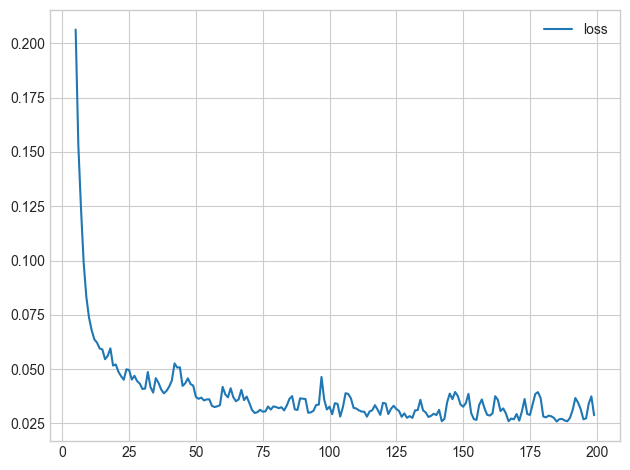

In [48]:
# looking at the loss curve

history_df = pd.DataFrame(history.history)

sns.lineplot(history_df.loc[5: , ['loss']])
# sns.lineplot(history_df)


## Train a Model with Early Stopping

In [50]:
red_wine = pd.read_csv('./dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [58]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0, # turn off training log
)


Minimum validation loss: 0.09230837970972061


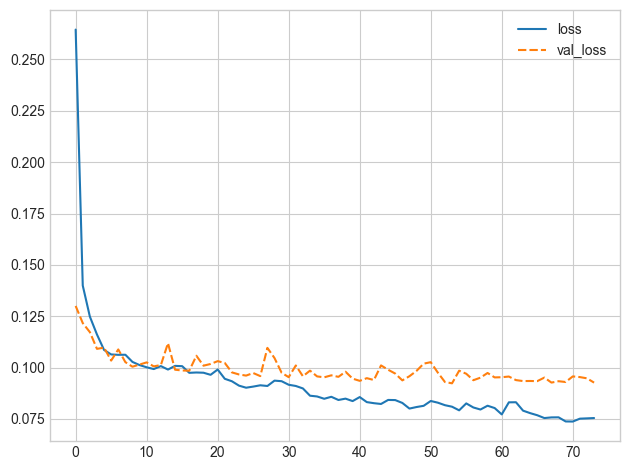

In [57]:
history_df = pd.DataFrame(history.history)
sns.lineplot(history_df.loc[:, ['loss', 'val_loss']])
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## Predicting Popular Songs on Spotify
### addressing overfitting and under fitting with Early Stopping

In [61]:
import matplotlib.pyplot as plt
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

C:\Users\black\AppData\Local\Temp\ipykernel_13112\2212077304.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


First load the Spotify dataset. Your task will be to predict the popularity of a song based on various audio features, like 'tempo', 'danceability', and 'mode'

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [67]:
spotify = pd.read_csv('./dl-course-data/spotify.csv')
display(spotify.info())

spotify.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

None

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [70]:
X = spotify.copy().dropna()
y = X.pop('track_popularity')

artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)


# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [18]


In [73]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[18]),
])

model.compile(
    optimizer='adam',
    loss ='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=500,
    epochs=50,
    # verbose=0, # suppress output since we'll plot the curves
)



Epoch 1/50
50/50 [==============================] - 3s 16ms/step - loss: 0.9314 - val_loss: 0.8753
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.8046 - val_loss: 0.7542
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 0.6884 - val_loss: 0.6428
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5831 - val_loss: 0.5418
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 0.4888 - val_loss: 0.4527
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4073 - val_loss: 0.3775
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3413 - val_loss: 0.3183
Epoch 8/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2927 - val_loss: 0.2758
Epoch 9/50
50/50 [==============================] - 0s 8ms/step - loss: 0.2589 - val_loss: 0.2456
Epoch 10/50
50/50 [==============================] - 0s 7ms/step - loss: 0.2351 - val_loss: 0.2246
Epoch 11/50
50/50

Minimum Validation Loss: 0.1940 


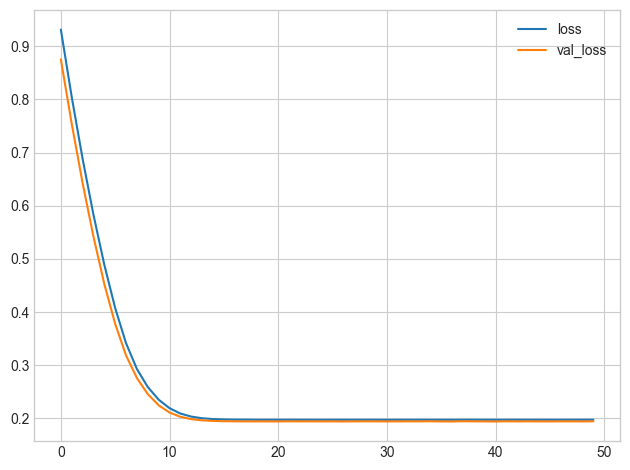

In [75]:
history_df = pd.DataFrame(history.history)
history_df.loc[ :, ['loss', 'val_loss']].plot()
print(f"Minimum Validation Loss: {history_df['val_loss'].min() :0.4f} ")

Minimum Validation Loss: 0.1940


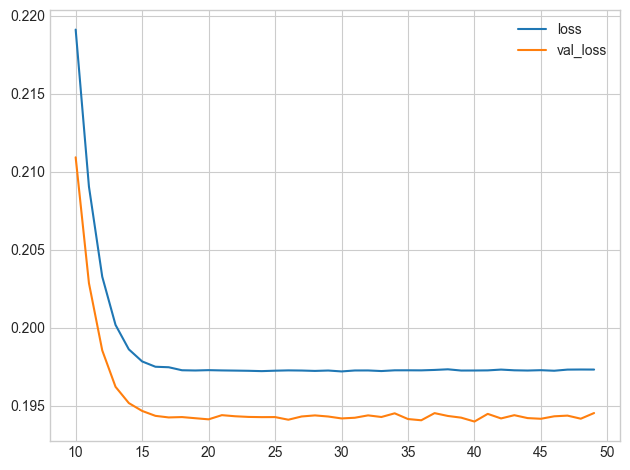

In [76]:
# Start the plot at epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# 1) Evaluate Baseline

What do you think? Would you say this model is underfitting, overfitting, just right?

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Epoch 1/50
49/49 [==============================] - 8s 23ms/step - loss: 0.2470 - val_loss: 0.2048
Epoch 2/50
49/49 [==============================] - 1s 11ms/step - loss: 0.2027 - val_loss: 0.1990
Epoch 3/50
49/49 [==============================] - 1s 25ms/step - loss: 0.1976 - val_loss: 0.1961
Epoch 4/50
49/49 [==============================] - 1s 14ms/step - loss: 0.1943 - val_loss: 0.1940
Epoch 5/50
49/49 [==============================] - 1s 10ms/step - loss: 0.1919 - val_loss: 0.1947
Epoch 6/50
49/49 [==============================] - 1s 12ms/step - loss: 0.1906 - val_loss: 0.1929
Epoch 7/50
49/49 [==============================] - 1s 15ms/step - loss: 0.1891 - val_loss: 0.1940
Epoch 8/50
49/49 [==============================] - 1s 17ms/step - loss: 0.1877 - val_loss: 0.1932
Epoch 9/50
49/49 [==============================] - 1s 15ms/step - loss: 0.1870 - val_loss: 0.1952
Epoch 10/50
49/49 [==============================] - 1s 17ms/step - loss: 0.1864 - val_loss: 0.1928
Epoch 11/

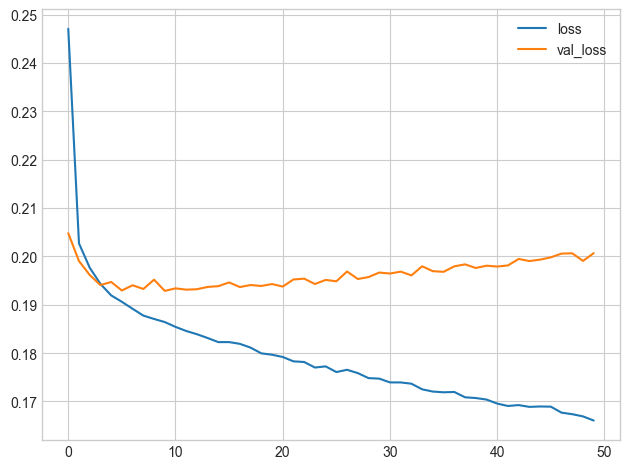

In [77]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Now the validation loss begins to rise very early, while the training loss continues to decrease. 

This indicates that the network has begun to overfit. At this point, we would need to try something to prevent it, either by reducing the number of units or through a method like early stopping. (We'll see another in the next lesson!)

# 3) Define Early Stopping Callback

Now define an early stopping callback that waits 5 epochs (`patience'`) for a change in validation loss of at least `0.001` (`min_delta`) and keeps the weights with the best loss (`restore_best_weights`).

In [80]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,     # minimium amount of change to count as an improvement
    patience=5,          # how many epochs to wait before stopping
    restore_best_weights=True,
)


Epoch 1/50
49/49 [==============================] - 5s 24ms/step - loss: 0.2319 - val_loss: 0.2025
Epoch 2/50
49/49 [==============================] - 1s 12ms/step - loss: 0.2006 - val_loss: 0.1969
Epoch 3/50
49/49 [==============================] - 1s 11ms/step - loss: 0.1961 - val_loss: 0.1954
Epoch 4/50
49/49 [==============================] - 1s 12ms/step - loss: 0.1935 - val_loss: 0.1964
Epoch 5/50
49/49 [==============================] - 1s 13ms/step - loss: 0.1915 - val_loss: 0.1950
Epoch 6/50
49/49 [==============================] - 0s 10ms/step - loss: 0.1906 - val_loss: 0.1951
Minimum Validation Loss: 0.1950


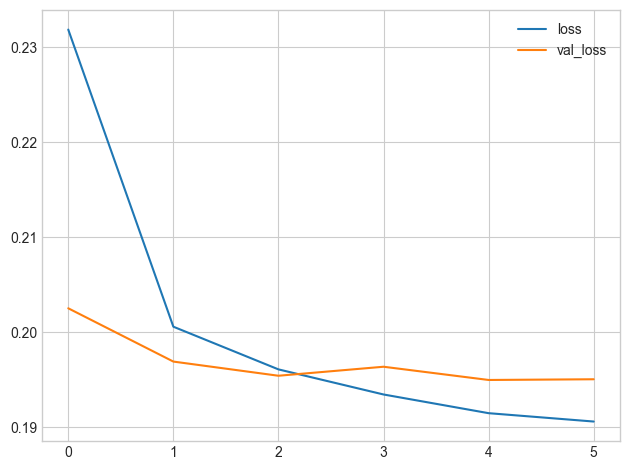

In [81]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

The early stopping callback did stop the training once the network began overfitting. Moreover, by including restore_best_weights we still get to keep the model where validation loss was lowest.

## Using Dropout and Batch Normalization


In [82]:

import pandas as pd
red_wine = pd.read_csv('./dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [83]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [94]:
from tensorflow.keras import callbacks

# YOUR CODE HERE: define an early stopping callback
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,     # minimium amount of change to count as an improvement
    patience=10,          # how many epochs to wait before stopping
    restore_best_weights=True,
)


model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    # callbacks=[early_stopping],
    verbose=0,
)


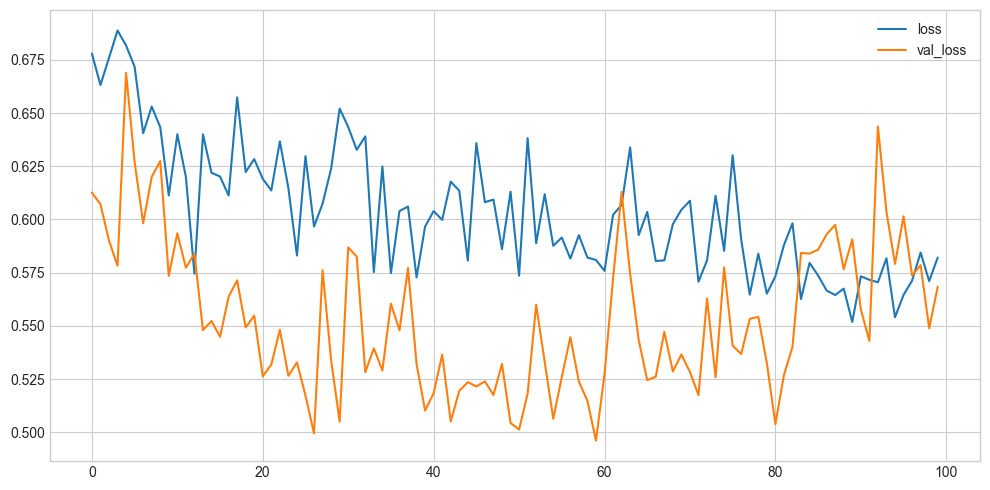

In [96]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot()

history_df.plot(figsize=(10,5))
plt.grid(True)
plt.show()